In [1]:
import io, requests

import numpy as np
import pandas as pd
import geopandas as gpd

import rasterio as rst
from rasterio.plot import show,show_hist
from rasterio.mask import mask

from osgeo import gdal

import matplotlib as mpl
from matplotlib import cm, colors
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

# Splitting a .tif file

In [12]:
dem=gdal.Open("GSOC_large.tif")
gt=dem.GetGeoTransform()

In [13]:
gt

(-180.0, 0.005, 0.0, 90.0, 0.0, -0.005)

In [14]:
xmin=gt[0]
ymax=gt[3]
res=gt[1]
xlen=res*dem.RasterXSize
ylen=res*dem.RasterYSize

In [15]:
#div=3
xdiv=2
ydiv=3

#xsize=ylen/div
#ysize=ylen/div
xsize=ylen/xdiv
ysize=ylen/ydiv

#xsteps=[xmin+xsize*i for i in range(div+1)]
#ysteps=[ymax-ysize*i for i in range(div+1)]
xsteps=[xmin+xsize*i for i in range(xdiv+1)]
ysteps=[ymax-ysize*i for i in range(ydiv+1)]

In [16]:
#for i in range(div):
    #for j in range(div):
    
for i in range(xdiv):
    for j in range(ydiv):
        xmin=xsteps[i]
        xmax=xsteps[i+1]
        ymax=ysteps[j]
        ymin=ysteps[j+1]
        
        print("xmin: "+str(xmin))
        print("xmax: "+str(xmax))
        print("ymin: "+str(ymin))
        print("ymax: "+str(ymax))
        print("\n")
        
        gdal.Translate("dem_translate"+str(i)+str(j)+".tif",dem,
                      projWin=(xmin,ymax,xmax,ymin))

xmin: -180.0
xmax: -90.0
ymin: 30.0
ymax: 90.0


xmin: -180.0
xmax: -90.0
ymin: -30.0
ymax: 30.0


xmin: -180.0
xmax: -90.0
ymin: -90.0
ymax: -30.0


xmin: -90.0
xmax: 0.0
ymin: 30.0
ymax: 90.0


xmin: -90.0
xmax: 0.0
ymin: -30.0
ymax: 30.0


xmin: -90.0
xmax: 0.0
ymin: -90.0
ymax: -30.0




# Splitting the splitted .tif

In [17]:
dem=gdal.Open("dem_translate00.tif")
gt=dem.GetGeoTransform()

In [18]:
xmin=gt[0]
ymax=gt[3]
res=gt[1]
xlen=res*dem.RasterXSize
ylen=res*dem.RasterYSize

In [19]:
#div=3
xdiv=9
ydiv=3

#xsize=ylen/div
#ysize=ylen/div
xsize=ylen/xdiv
ysize=ylen/ydiv

#xsteps=[xmin+xsize*i for i in range(div+1)]
#ysteps=[ymax-ysize*i for i in range(div+1)]
xsteps=[xmin+xsize*i for i in range(xdiv+1)]
ysteps=[ymax-ysize*i for i in range(ydiv+1)]

In [20]:
#for i in range(div):
    #for j in range(div):
    
for i in range(xdiv):
    for j in range(ydiv):
        xmin=xsteps[i]
        xmax=xsteps[i+1]
        ymax=ysteps[j]
        ymin=ysteps[j+1]
        
        print("xmin: "+str(xmin))
        print("xmax: "+str(xmax))
        print("ymin: "+str(ymin))
        print("ymax: "+str(ymax))
        print("\n")
        
        gdal.Translate("dem2_translate"+str(i)+str(j)+".tif",dem,
                      projWin=(xmin,ymax,xmax,ymin))

xmin: -180.0
xmax: -173.33333333333334
ymin: 70.0
ymax: 90.0


xmin: -180.0
xmax: -173.33333333333334
ymin: 50.0
ymax: 70.0


xmin: -180.0
xmax: -173.33333333333334
ymin: 30.0
ymax: 50.0


xmin: -173.33333333333334
xmax: -166.66666666666666
ymin: 70.0
ymax: 90.0


xmin: -173.33333333333334
xmax: -166.66666666666666
ymin: 50.0
ymax: 70.0


xmin: -173.33333333333334
xmax: -166.66666666666666
ymin: 30.0
ymax: 50.0


xmin: -166.66666666666666
xmax: -160.0
ymin: 70.0
ymax: 90.0


xmin: -166.66666666666666
xmax: -160.0
ymin: 50.0
ymax: 70.0


xmin: -166.66666666666666
xmax: -160.0
ymin: 30.0
ymax: 50.0


xmin: -160.0
xmax: -153.33333333333334
ymin: 70.0
ymax: 90.0


xmin: -160.0
xmax: -153.33333333333334
ymin: 50.0
ymax: 70.0


xmin: -160.0
xmax: -153.33333333333334
ymin: 30.0
ymax: 50.0


xmin: -153.33333333333334
xmax: -146.66666666666666
ymin: 70.0
ymax: 90.0


xmin: -153.33333333333334
xmax: -146.66666666666666
ymin: 50.0
ymax: 70.0


xmin: -153.33333333333334
xmax: -146.66666666666666
y

# Area needed is (-140,-130),(58,64)

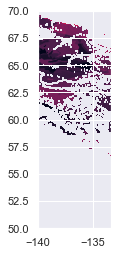

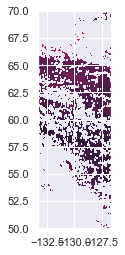

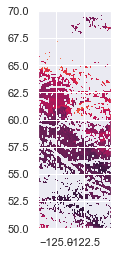

<AxesSubplot:>

In [21]:
#files are 20Mb each

rst2_61 = r'dem2_translate61.tif'
img2_61 = rst.open(rst2_61)
show(img2_61)

rst2_71 = r'dem2_translate71.tif'
img2_71 = rst.open(rst2_71)
show(img2_71)

rst2_81 = r'dem2_translate81.tif'
img2_81 = rst.open(rst2_81)
show(img2_81)

Not sure if this is how it looked originally.

# Others

In [2]:
#file is 600Mb, testing if can load 

rst_abg = r'N40W100_Above Ground Biomass.tif'
img_abg = rst.open(rst_abg)

ok

In [ ]:
show(img_abg)

not ok

need to test if can clip as is.

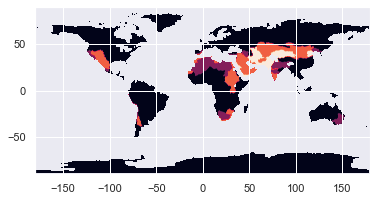

<AxesSubplot:>

In [12]:
rst_water = r'WaterScarcity_GAEZ.tif'
img_water = rst.open(rst_water)
show(img_water)

Seems data not available for the area needed.

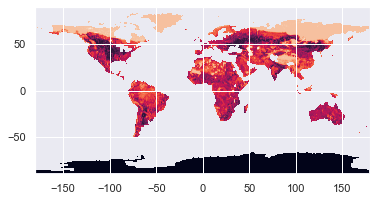

<AxesSubplot:>

In [13]:
rst_rainsoil = r'SoilResources_RainfedSoilTerrainSuitability_GAEZ.tif'
img_rainsoil = rst.open(rst_rainsoil)
show(img_rainsoil)

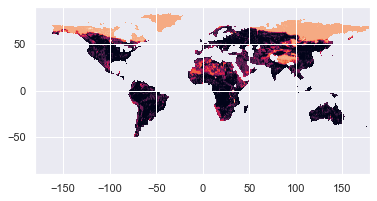

<AxesSubplot:>

In [14]:
rst_root = r'SoilResources_RootingConditions_GAEZ.tif'
img_root = rst.open(rst_root)
show(img_root)

# Older attempt at splitting another file

In [68]:
rst00 = r'dem_translate00.tif'
img00 = rst.open(rst00)

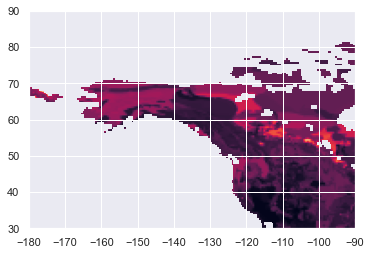

<AxesSubplot:>

In [69]:
show(img00)
#y:58-64 (3)
#x:-140- -131 (9)
#4,1

In [9]:
rst3 = r'carbon_dens_masked.tiff'
img3 = rst.open(rst3)

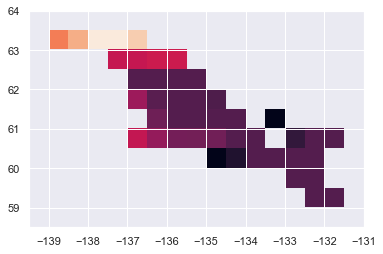

<AxesSubplot:>

In [10]:
show(img3)